# 4.7.1 데이터 추가 처리

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.read_csv('comb31-IQR30.csv')
df.shape

(20495, 31)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20495 entries, 0 to 20494
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ACCESS   20495 non-null  float64
 1   ACR      20495 non-null  float64
 2   AGEP     20495 non-null  int64  
 3   BATH     20495 non-null  float64
 4   BDSP     20495 non-null  float64
 5   BLD      20495 non-null  float64
 6   COW      11562 non-null  float64
 7   ELEP     20495 non-null  float64
 8   FESRP    20495 non-null  int64  
 9   FKITP    20495 non-null  float64
 10  FPARC    17899 non-null  float64
 11  FSCHP    20495 non-null  int64  
 12  FTAXP    20495 non-null  float64
 13  GASP     20495 non-null  float64
 14  HHL      20495 non-null  float64
 15  HHT      20495 non-null  float64
 16  HINCP    20495 non-null  float64
 17  LANX     19471 non-null  float64
 18  MAR      20495 non-null  int64  
 19  MV       20495 non-null  float64
 20  NRC      20495 non-null  float64
 21  R18      204

In [3]:
df.dtypes

ACCESS     float64
ACR        float64
AGEP         int64
BATH       float64
BDSP       float64
BLD        float64
COW        float64
ELEP       float64
FESRP        int64
FKITP      float64
FPARC      float64
FSCHP        int64
FTAXP      float64
GASP       float64
HHL        float64
HHT        float64
HINCP      float64
LANX       float64
MAR          int64
MV         float64
NRC        float64
R18        float64
R65        float64
RAC1P        int64
RMSP       float64
RWAT       float64
SCH        float64
SCHL       float64
SEX          int64
VALP       float64
VALP_B1    float64
dtype: object

In [4]:
df.isna().any()[lambda x: x]   # 결측값을 갖고 있는 변수명(컬럼명) 찾기

COW      True
FPARC    True
LANX     True
SCH      True
SCHL     True
dtype: bool

In [5]:
# 데이터프레임 df에 있는 모든 컬럼(변수)의 결측값 보유 비율을 확인 

df.isnull().mean().sort_values(ascending=False) # 결측값 비율을 내림차순으로 보여주기

COW        0.435862
FPARC      0.126665
LANX       0.049963
SCHL       0.029910
SCH        0.029910
ACCESS     0.000000
VALP       0.000000
SEX        0.000000
RWAT       0.000000
RMSP       0.000000
RAC1P      0.000000
R65        0.000000
R18        0.000000
NRC        0.000000
MV         0.000000
MAR        0.000000
HHT        0.000000
HINCP      0.000000
ACR        0.000000
HHL        0.000000
GASP       0.000000
FTAXP      0.000000
FSCHP      0.000000
FKITP      0.000000
FESRP      0.000000
ELEP       0.000000
BLD        0.000000
BDSP       0.000000
BATH       0.000000
AGEP       0.000000
VALP_B1    0.000000
dtype: float64

In [6]:
cols = ['COW','FPARC','LANX','SCH','SCHL']     # 결측값을 갖는 5개 변수명을 cols에 저장
df[cols] = df[cols].fillna(0).astype(np.int64) # 5개 변수의 결측값을 0으로 대체

In [7]:
df[cols].isnull().mean() # 5개 변수의 결측값 비율

COW      0.0
FPARC    0.0
LANX     0.0
SCH      0.0
SCHL     0.0
dtype: float64

In [8]:
# 참조 코딩
df[cols].dtypes

COW      int64
FPARC    int64
LANX     int64
SCH      int64
SCHL     int64
dtype: object

In [9]:
df.shape

(20495, 31)

In [10]:
df.columns

Index(['ACCESS', 'ACR', 'AGEP', 'BATH', 'BDSP', 'BLD', 'COW', 'ELEP', 'FESRP',
       'FKITP', 'FPARC', 'FSCHP', 'FTAXP', 'GASP', 'HHL', 'HHT', 'HINCP',
       'LANX', 'MAR', 'MV', 'NRC', 'R18', 'R65', 'RAC1P', 'RMSP', 'RWAT',
       'SCH', 'SCHL', 'SEX', 'VALP', 'VALP_B1'],
      dtype='object')

In [12]:
df.to_csv('2017DC1-all.csv', index=False)

In [13]:
df_with_VALP_B1 = df.drop(['VALP'], axis=1)   # 타겟변수 VALP를 제외한 변수를 저장
df_with_VALP_B1.shape

(20495, 30)

In [14]:
# 참조 코딩
df_with_VALP_B1.columns

Index(['ACCESS', 'ACR', 'AGEP', 'BATH', 'BDSP', 'BLD', 'COW', 'ELEP', 'FESRP',
       'FKITP', 'FPARC', 'FSCHP', 'FTAXP', 'GASP', 'HHL', 'HHT', 'HINCP',
       'LANX', 'MAR', 'MV', 'NRC', 'R18', 'R65', 'RAC1P', 'RMSP', 'RWAT',
       'SCH', 'SCHL', 'SEX', 'VALP_B1'],
      dtype='object')

In [16]:
df_with_VALP_B1.to_csv('2017DC1.csv', index=False)

# 4.7.2 데이터 분할 및 대체

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('2017DC1.csv')
df.shape

(20495, 30)

In [12]:
# 참조 코딩
df.dtypes

ACCESS     float64
ACR        float64
AGEP         int64
BATH       float64
BDSP       float64
BLD        float64
COW          int64
ELEP       float64
FESRP        int64
FKITP      float64
FPARC        int64
FSCHP        int64
FTAXP      float64
GASP       float64
HHL        float64
HHT        float64
HINCP      float64
LANX         int64
MAR          int64
MV         float64
NRC        float64
R18        float64
R65        float64
RAC1P        int64
RMSP       float64
RWAT       float64
SCH          int64
SCHL         int64
SEX          int64
VALP_B1    float64
dtype: object

In [2]:
# 참조 코딩
# 범주형 변수를 cols1에 저장.
cols = ['ACCESS', 'ACR', 'BATH', 'BLD', 'COW', 'FESRP', 'FKITP', 'FPARC', 'FSCHP',\
         'FTAXP', 'HHL', 'HHT', 'LANX', 'MAR', 'MV', 'R18', 'R65', 'RAC1P', 'RWAT',\
         'SCH', 'SCHL', 'SEX', 'VALP_B1'] 

# 범주형 변수의 dtype을 category로 변경
df[cols] = df[cols].astype('category')
df.dtypes

ACCESS     category
ACR        category
AGEP          int64
BATH       category
BDSP        float64
BLD        category
COW        category
ELEP        float64
FESRP      category
FKITP      category
FPARC      category
FSCHP      category
FTAXP      category
GASP        float64
HHL        category
HHT        category
HINCP       float64
LANX       category
MAR        category
MV         category
NRC         float64
R18        category
R65        category
RAC1P      category
RMSP        float64
RWAT       category
SCH        category
SCHL       category
SEX        category
VALP_B1    category
dtype: object

In [3]:
data = df.drop(['VALP_B1'], axis=1)   # 타겟변수를 제외한 입력변수를 data에 저장
target = df['VALP_B1']                # 타겟변수만 target에 저장

In [15]:
data.shape

(20495, 29)

In [16]:
target.shape

(20495,)

In [4]:
# 50:50 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.5, random_state=42)   # test_size=0.5임에 주의 

# 4.7.3 Random Forest 모델

In [5]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 
model = rf.fit(X_train, y_train) 
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
#accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train))) 
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred))) 

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.83109


In [6]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 

In [7]:
# 그리드 서치 실행

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold  

# StratifiedKFold의 random_state 옵션값을 특정 숫자(예: 0)로 고정
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
params = {'max_depth': range(10, 41), 'n_estimators': [100, 200]}

# GridSearchCV의 cv=cross_validation 옵션값은 위의 StratifiedKFold의 random_state 옵션값을 적용시켜서
# GridSearchCV를 실행핼 때마다 결과가 항상 동일하게 나오도록 보장
grid_rf = GridSearchCV(rf, param_grid=params, scoring='accuracy', cv=cross_validation,
                       verbose=1, n_jobs=-1) 
grid_rf.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_rf.best_score_))
print("GridSearchCV best parameter:", (grid_rf.best_params_)) 

Fitting 5 folds for each of 62 candidates, totalling 310 fits
GridSearchCV max accuracy:0.82922
GridSearchCV best parameter: {'max_depth': 28, 'n_estimators': 200}


In [8]:
best_clf = grid_rf.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

Accuracy on test set:0.83265
ROC AUC on test set:0.90991


In [23]:
# 참조 코딩
print ("Feature importances:") 
print (best_clf.feature_importances_) 

Feature importances:
[0.01802438 0.0510586  0.07630445 0.00050864 0.05946399 0.00291882
 0.03123149 0.08543801 0.00622645 0.00174505 0.02225325 0.00616668
 0.01696247 0.06415757 0.01339109 0.02582611 0.18708085 0.0068799
 0.01577542 0.0588845  0.02646556 0.00840663 0.01769451 0.02223121
 0.08798852 0.0005029  0.0105417  0.06171582 0.01415543]


In [9]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기 

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 3), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)   
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리 

,Feature_importances
HINCP,0.187
RMSP,0.088
ELEP,0.085
AGEP,0.076
GASP,0.064
SCHL,0.062
MV,0.059
BDSP,0.059
ACR,0.051
COW,0.031


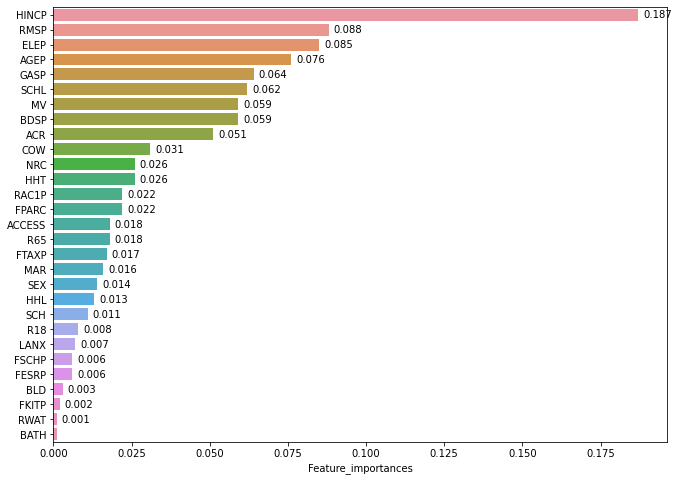

In [10]:
# 데이터프레임 dft1의 막대그래프(barplot) 그리기
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig, ax = plt.subplots(figsize=(11, 8))
ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1.3),
                xytext=(5, 10), textcoords='offset points')

In [ ]:
# 참고 코딩

In [35]:
# 70:30 데이터 분할
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( 
    data, target, test_size=0.3, random_state=42)   # test_size=0.5임에 주의 

In [36]:
# Random Forest 모델 (Default 모델, tree depth 제한 없음)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators = 100, random_state=0) 
model = rf.fit(X_train, y_train) 
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성
accuracy = accuracy_score(y_test, pred)

print ("Random Forest Accuracy on training set:{:.5f}".format(model.score(X_train, y_train))) 
print ("Random Forest Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Random Forest Accuracy on training set:1.00000
Random Forest Accuracy on test set:0.86079
